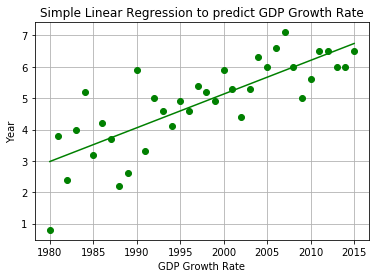

In [3]:
# linear regression equation as simple as drinking water.
# it is nothing but just a straight line equation.
# y = m*x + c
# Reallllyyy!!!! yes, above equation is a simple linear regression equation

import csv
import numpy as np
import matplotlib.pyplot as plt

# numpy array declaration for real data of given dataset
real_year            = np.array([[]], dtype = np.float64)
real_gdp_growth_rate = np.array([[]], dtype = np.float64) 

# random m and c value of linear regression equation y  = m * x + c
m = np.random.random((1, 1))
c = np.random.random((1, 1))

def build_dataset():
    global real_year, real_gdp_growth_rate
    
    with open('bd_gdp_growth_rate.csv', 'r') as f:
        dataset = csv.DictReader(f)
        for data in dataset:
            real_year = np.append(real_year, [[float(data['Year'])]], axis = 1)
            real_gdp_growth_rate = np.append(real_gdp_growth_rate,\
                                             [[float(data['GDP Growth Rate'])]], axis = 1)
    return 0

def calculation():
    global m, c, real_year, real_gdp_growth_rate
    
    # equations of slope m and y-axis interceptor c as follows -
    # m = (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
    # c = (Σ(x^2) * Σy - Σx * Σxy) / (n * Σ(x^2) - (Σx)^2)
    
    n      = real_year.size                        # n
    Ex     = np.sum(real_year)                     # Σx
    E_x2   = np.sum(real_year**2)                  # Σ(x^2)
    Ex_2   = np.sum(real_year)**2                  # (Σx)^2
    Ey  = np.sum(real_gdp_growth_rate)             # Σy
    Exy = np.sum(real_year * real_gdp_growth_rate) # Σ(xy)
    denominator = n * E_x2 - Ex_2                  # n * Σ(x^2) - (Σx)^2
    
    m = (n * Exy - Ex * Ey) / denominator    # (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
    c = (E_x2 * Ey - Ex * Exy) / denominator # (Σ(x^2) * Σy - Σx * Σxy) / (n * Σ(x^2) - (Σx)^2)
    
    return 0
    
def main():
    build_dataset()
    calculation()
    return 0
    
main()     

# graph plot using matplotlib.pyplot
dataset_len = real_year.size
plt.plot(real_year.reshape(dataset_len), real_gdp_growth_rate.reshape(dataset_len), 'go')
plt.plot(real_year.reshape(dataset_len), (m * real_year + c).reshape(dataset_len), 'g-')
plt.grid(True)
plt.title('Simple Linear Regression to predict GDP Growth Rate')
plt.ylabel('Year')
plt.xlabel('GDP Growth Rate')

plt.show()

In [4]:
year_to_predict = int(input('Enter year to predict GDP Growth Rate = '))
print('Predicted GDP Growth Rate = ', m * year_to_predict + c)

Enter year to predict GDP Growth Rate = 2020
Predicted GDP Growth Rate =  7.2796439296385245
